# FSS SE-01 
Jakob Schwarz 24-720-252 <br>
Mohammad Reza Baghban 24-744-179<br>
Muhammad Ansar Butt 24-747-933

In [1]:
import pydriller
import pandas as pd
import matplotlib.pyplot as plt
import os
import regex as re
import mccabe
import seaborn as sns
import json
import lizard
import logging
import numpy as np
from collections import Counter
from itertools import combinations
from datetime import timedelta
from collections import defaultdict

# Repository Setup and Procedure for React Codebase Analysis

To keep our work organized and avoid modifying the React repository directly, we set up our own repository with React included in our `.gitignore` file (`/react`). This allows us to access the React codebase for analysis without committing any changes to it. We prepared for the assignment using the following steps:

1. Clone the React codebase within our project directory:
   ```bash
   git clone https://github.com/facebook/react
   ```

2. Check out the required React version (v18.3.1) by navigating into the `react` directory and switching branches:
   ```bash
   cd react
   git checkout v18.3.1
   cd ..
   ```

By following this setup, we maintain a clean separation between our analysis files and the React codebase, ensuring that React remains unmodified in our own repository.

# Task 1: Component-Level Codebase Overview

- Using the latest stable release of React, v18.3.1, list all the components. In
React, there are two main types of components: Class-based Components and
Functional Components. Class-based components are defined where there is
a class declaration that extends ‘React.Component‘ or ‘React.PureComponent‘.
Function-based components are JavaScript functions that return JSX elements
(JavaScript XML, return elements enclosed in brackets (return <...>) ). To
find these components in the React codebase, look for any ‘.js‘ file, and scan the
file content for patterns mentioned above (hint: use regrex to find the patterns)

In [2]:
def list_react_components(directory='./react'):
    class_components = []
    function_components = []
    
    # Regular expressions to match components
    class_component_pattern = re.compile(r'class\s+(\w+)\s+extends\s+React\.(Component|PureComponent)')
    function_component_pattern = re.compile(r'function\s+(\w+)\s*\(.*\)\s*\{[^}]*return\s*\(<')

    # Walk through the directory and analyze .js files
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.js'):
                file_path = os.path.join(root, file)
                
                with open(file_path, 'r', encoding='utf-8') as f:
                    content = f.read()
                    
                    # Find class components
                    class_matches = class_component_pattern.findall(content)
                    for match in class_matches:
                        component_name = match[0]
                        class_components.append((component_name, file_path))
                    
                    # Find function components
                    function_matches = function_component_pattern.findall(content)
                    for match in function_matches:
                        component_name = match
                        function_components.append((component_name, file_path))

    # Print results
    print("Class-based Components:")
    for component, path in class_components:
        print(f"Component: {component}, File: {path}")
    
    print("\nFunction-based Components:")
    for component, path in function_components:
        print(f"Component: {component}, File: {path}")

    return class_components, function_components

# Run the function
class_components, function_components = list_react_components()


Class-based Components:
Component: VectorWidget, File: ./react\fixtures\art\VectorWidget.js
Component: Result, File: ./react\fixtures\attribute-behavior\src\App.js
Component: App, File: ./react\fixtures\attribute-behavior\src\App.js
Component: Suspending, File: ./react\fixtures\devtools\regression\shared.js
Component: ProfilerChild, File: ./react\fixtures\devtools\regression\shared.js
Component: StrictModeChild, File: ./react\fixtures\devtools\regression\shared.js
Component: SimpleApp, File: ./react\fixtures\devtools\regression\shared.js
Component: App, File: ./react\fixtures\dom\src\components\App.js
Component: Fixture, File: ./react\fixtures\dom\src\components\Fixture.js
Component: FixtureSet, File: ./react\fixtures\dom\src\components\FixtureSet.js
Component: Header, File: ./react\fixtures\dom\src\components\Header.js
Component: IframePortal, File: ./react\fixtures\dom\src\components\Iframe.js
Component: IframeSubtree, File: ./react\fixtures\dom\src\components\Iframe.js
Component: Te

---

- Use Madge tool<sup>3</sup> to detect dependencies between React files. Madge is a tool
that analyzes dependencies in software projects making it easier to understand
the complexities of file interactions within a codebase. Report all the dependen-
cies in a JSON file. Use this JSON file and find and report the top 3 files with
the highest number of dependencies. Provide the data in a JSON file with the
following format:

In [33]:
os.makedirs('./documentation', exist_ok=True)

```bash
npm install -g madge
cd react
madge --json . > ../documentation/dependencies_18.3.1.json
```

In [34]:
def analyze_dependencies(version):
    input_file=(f'documentation/dependencies_{version}.json')
    output_file= (f'documentation/top_dependencies_{version}.json')
    # Load the dependencies data
    with open(input_file, 'r') as f:
        dependencies = json.load(f)
    
    # Count dependencies for each file
    dependency_counts = {file: len(dependencies[file]) for file in dependencies}
    
    # Find the top 3 files with the highest number of dependencies
    top_files = sorted(dependency_counts.items(), key=lambda x: x[1], reverse=True)[:3]
    
    # Format the results
    top_dependencies = {file: dependencies[file] for file, _ in top_files}
    
    # Save the top dependencies to a JSON file
    with open(output_file, 'w') as f:
        json.dump(top_dependencies, f, indent=4)
    
    print(f"Top dependencies saved to {output_file}")

In [35]:
# Run the analysis
version="18.3.1"
analyze_dependencies(version)

Top dependencies saved to documentation/top_dependencies_18.3.1.json


---

- Identify the commit that resulted in the most substantial change between v17.0.1
and v17.0.2 versions of React. Use Git commands to explore the commit history
and quantify changes based on the number of files affected. Document the
commit hash, number of files changed, number of insertions and number of
deletions.

```bash
cd react
git fetch --all
git checkout v17.0.2
git log v17.0.1..v17.0.2 --stat
```

**Most Substantial Commit Between v17.0.1. and v17.0.2**  
- Commit Hash: `12adaffef7105e2714f82651ea51936c563fe15c`  
- Number of Files Changed: 4  
- Number of Insertions: 15  
- Number of Deletions: 123

<pre>
<span style="color: yellow;">commit 12adaffef7105e2714f82651ea51936c563fe15c (<span style="color: cyan;">HEAD</span>, tag: v17.0.2, <span style="color: red;">origin/17.0.2</span>)</span>
Author: Brian Vaughn &lt;bvaughn@fb.com&gt;
Date:   Thu Feb 18 11:21:52 2021 -0500

    Remove scheduler sampling profiler shared array buffer (#20840)
    
    No one has been using this data so there's no reason to collect it. Event log has been maintained and tests have been updated.

 packages/scheduler/src/Scheduler.js                         |  2 <span style="color: red;">--</span>
 packages/scheduler/src/SchedulerFeatureFlags.js             |  2 <span style="color: green;">+-</span>
 packages/scheduler/src/SchedulerProfiling.js                | 56 <span style="color: red;">--------------------------------------------------------</span>
 packages/scheduler/src/__tests__/SchedulerProfiling-test.js | 78 <span style="color: green;">+++++++++++++</span><span style="color: red;">----------------------------------------------------------------</span>
 4 files changed, 15 insertions(+), 123 deletions(-)
</pre>

---

- Check out the repository at the commit hash identified in the previous step. This allows you to view the state of the codebase at the time of that commit. After checking out, use Madge to analyze the dependencies at this specific commit point. To trace how dependencies changed and evolved over time compare these dependencies to those detected before the checkout (i.e., in the current latest version). Document any new dependencies introduced, or dependencies removed.

```bash
git checkout b2bbee7ba31bb7d212a9ff2e682a695a32f8a87f
madge --json . > ../documentation/dependencies_b2bbee7ba31bb7d212a9ff2e682a695a32f8a87f.json
```

In [38]:
def compare_dependencies(version_one, version_two):
    file_one=(f'documentation/dependencies_{version_one}.json')
    file_two=(f'documentation/dependencies_{version_two}.json')
    output_file=(f'documentation/dependenies_changed_{version_one}_{version_two}.json')
    # Load the dependency files
    with open(file_one, 'r') as f:
        file_one_dependency = json.load(f)
    
    with open(file_two, 'r') as f:
        file_two_dependency = json.load(f)
    
    # Compare dependencies
    introduced = {}
    removed = {}
    
    # Check for new dependencies
    for file, dependency in file_two_dependency.items():
        if file not in file_one_dependency:
            introduced[file] = dependency
        else:
            new_dependency = set(dependency) - set(file_one_dependency[file])
            if new_dependency:
                introduced[file] = list(new_dependency)
    
    # Check for removed dependencies
    for file, dependency in file_one_dependency.items():
        if file not in file_two_dependency:
            removed[file] = dependency
        else:
            removed_dependency = set(dependency) - set(file_two_dependency[file])
            if removed_dependency:
                removed[file] = list(removed_dependency)
    
    # Save the results
    changes = {
        "introduced": introduced,
        "removed": removed
    }
    
    with open(output_file, 'w') as f:
        json.dump(changes, f, indent=4)
    
    print(f"Dependency changes saved to {output_file}")

In [39]:
latest_version='18.3.1'
commit_version='b2bbee7ba31bb7d212a9ff2e682a695a32f8a87f'
# Run the comparison
compare_dependencies(commit_version, latest_version)

Dependency changes saved to documentation/dependenies_changed_b2bbee7ba31bb7d212a9ff2e682a695a32f8a87f_18.3.1.json


---

# Task 2: Temporal and Logical Coupling Analysis

Logical coupling often occurs because two seemingly separate parts of the code are
functionally related. It can be detected by mining software repositories to see which
files or modules tend to be committed together frequently over time. Temporal coupling
can arise from development practices, such as when features are developed in
parallel and merged at similar times. This is observed by looking at commits and/or
their timestamps to identify files that are often changed together in commits or in close
temporal proximity to one another.

- To analyze coupling, look at files that were changed in a specific time window.
Analyse which files are changed together (Not necessarily the same commit)
within a time window of 24, 48, and 72 hours of each other. Report your result
in a JSON file with the following format. For each time window, report the top 3
file pairs with the highest degree of temporal coupling.


Decisions: We have limited files to .JS files to be aligned with the limitation we applied in the 1st task

In [ ]:
from pydriller import Repository

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S"
)

""" Extract commits with `.js` files from the repository and sort them by timestamp. """
def extractAndSortCommits(repo_path):
    
    logging.info("Starting repository mining...")
    commits = []

    for commit in pydriller.Repository(repo_path).traverse_commits():
        jsFiles = {mf.new_path for mf in commit.modified_files if mf.new_path and mf.new_path.endswith('.js')}
        if jsFiles:  # Only add commits with .js files
            commitRecord = { "timestamp": commit.committer_date, "files": jsFiles }
            commits.append(commitRecord)

    commits.sort(key=lambda x: x["timestamp"])
    logging.info(f"Total commits with `.js` files: {len(commits)}")
    return commits

""" Analyze temporal coupling for a subset of commits. """
def analyzeTemporalCoupling(commits, time_windows):
    coupling_counts = {timeWindow: defaultdict(int) for timeWindow in time_windows}

    for index, current_commit in enumerate(commits):
        for timeWindow in time_windows:
            time_limit = current_commit["timestamp"] + timedelta(hours=timeWindow)
            current_files = current_commit["files"]

            for next_commit in commits[index + 1:]:
                if next_commit["timestamp"] > time_limit:
                    break

                for file1 in current_files:
                    for file2 in next_commit["files"]:
                        if file1 != file2:
                            file_pair = tuple(sorted([file1, file2]))
                            coupling_counts[timeWindow][file_pair] += 1
    return coupling_counts

""" Extract the top N file pairs with the highest degree of temporal coupling for each time window """
def extractTopCouplings(coupling_counts, topN=3):
    results = {}
    for timeWindow, counts in coupling_counts.items():
        sortedCounts = sorted(counts.items(), key=lambda x: x[1], reverse=True)[:topN]
        results[timeWindow] = [{"files": list(pair), "count": count} for pair, count in sortedCounts]
    return results

def generateCouplingReport(coupling_counts):
    results = []
    for timeWindow, counts in coupling_counts.items():
        for file_pair, commit_count in counts.items():
            # Add data in the required format
            results.append({
                "file_pair": list(file_pair),
                "coupled_commits": {
                    "time_window": timeWindow,
                    "commit_count": commit_count
                }
            })
    return results

""" Save data to a JSON file. """
def saveToJson(data, filename):
    with open(filename, 'w') as f:
        json.dump(data, f, indent=4)

def main():
    repo_path = "./react"  # Path to the repository
    raw_output_file = "./documentation/Task2.1 - Temporal Coupling - Raw.json"
    top_output_file = "./documentation/Task2.1 - Temporal Coupling - Top3.json"
    time_windows = [24, 48, 72]

    # Temporal Coupling Analysis
    logging.info("Starting temporal coupling analysis...")
    commits = extractAndSortCommits(repo_path)
    coupling_counts = analyzeTemporalCoupling(commits, time_windows)

    # Save all results before limiting
    full_results = generateCouplingReport(coupling_counts)
    saveToJson(full_results, raw_output_file)
    logging.info(f"Full temporal coupling results saved to {raw_output_file}.")

    # Limit to top 3 and save separately
    temporal_results = extractTopCouplings(coupling_counts, topN=3)
    saveToJson(temporal_results, top_output_file)
    logging.info(f"Top 3 temporal coupling results saved to {top_output_file}.")

    logging.info("Analysis complete.")

main()


Overall Temporal coupling saved to ./documentation/Task2.1 - Temporal Coupling - Raw.json and zipped in 7z

Top 3 Temporal coupling saved to ./documentation/Task2.1 - Temporal Coupling - Top3.json


| Key | File 1                                                    | File 2                                                    | Count |
|-----|-----------------------------------------------------------|-----------------------------------------------------------|-------|
| 24  | src\renderers\shared\fiber\ReactFiberBeginWork.js         | src\renderers\shared\fiber\ReactFiberScheduler.js         | 729   |
| 24  | src\renderers\shared\fiber\ReactFiber.js                  | src\renderers\shared\fiber\ReactFiberBeginWork.js         | 559   |
| 24  | src\renderers\shared\fiber\ReactFiberBeginWork.js         | src\renderers\shared\fiber\ReactFiberCompleteWork.js      | 509   |
| 48  | src\renderers\shared\fiber\ReactFiberBeginWork.js         | src\renderers\shared\fiber\ReactFiberScheduler.js         | 916   |
| 48  | src\backend\renderer.js                                   | src\devtools\store.js                                     | 803   |
| 48  | packages\react-reconciler\src\ReactFiberWorkLoop.new.js   | packages\react-reconciler\src\ReactFiberWorkLoop.old.js   | 688   |
| 72  | src\backend\renderer.js                                   | src\devtools\store.js                                     | 1108  |
| 72  | src\renderers\shared\fiber\ReactFiberBeginWork.js         | src\renderers\shared\fiber\ReactFiberScheduler.js         | 992   |
| 72  | packages\react-reconciler\src\ReactFiberWorkLoop.new.js   | packages\react-reconciler\src\ReactFiberWorkLoop.old.js   | 888   |


---

- Identify cases of logical coupling by finding files frequently committed together.
Report your findings in a JSON file and report the top 3 file pairs with the highest
degree of logical coupling.


Decisions: We have limited files to .JS files to be aligned with the limitation we applied in the 1st task

In [ ]:
# Configure logging to output INFO level messages
logging.basicConfig(
    level=logging.INFO,  # Set logging level to INFO to see INFO messages
    format="%(asctime)s - %(levelname)s - %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S"
)

""" 
    Analyze logical coupling in a Git repository and return top file pairs.
    Returns: list of Top file pairs committed together with their frequencies.
"""
def analyzeLogicalCoupling(repo_path, top_n=3):  

    filePairs = Counter()

    # Traverse repository commits
    for commit_counter, commit in enumerate(Repository(repo_path).traverse_commits(), start=1):
        logging.info(f"Date: {commit.committer_date} | {commit.hash} by {commit.author.name}")
        javaScriptFiles = [mod.new_path for mod in commit.modified_files if mod.new_path and mod.new_path.endswith('.js')]

        if len(javaScriptFiles) > 1:
            sortedJsFiles = sorted(javaScriptFiles)
            allPossibleCombination = combinations(sortedJsFiles,2)
            filePairs.update(allPossibleCombination)

    # Get top file pairs
    return filePairs

""" Generate logical coupling data in the required JSON format. """
def generateLogicalCouplingReport(filePairs):
    results = [
        {
            "file_pair": list(pair),
            "commits": count
        }
        for pair, count in filePairs.items()
    ]
    return results

""" Extract the top N logical couplings. """
def extractTopCouplings(filePairs, top_n=3):
    topCouplings = filePairs.most_common(top_n)
    return [{"file_pair": list(pair), "commits": count} for pair, count in topCouplings]

""" Save data to a JSON file. """
def saveToJson(data, filename):
    with open(filename, 'w') as f:
        json.dump(data, f, indent=4)

def main():
    repo_path = "./react"  # Path to the repository
    raw_output_file = "./documentation/Task2.2 - Logical Coupling - Raw.json"
    top_output_file = "./documentation/Task2.2 - Logical Coupling - Top3.json"

    print("Analyzing logical coupling...")
    filePairs = analyzeLogicalCoupling(repo_path)

    # Save all results before filtering
    raw_results = generateLogicalCouplingReport(filePairs)
    saveToJson(raw_results, raw_output_file)
    print(f"Full results saved to {raw_output_file}")

    # Save top 3 results
    top_results = extractTopCouplings(filePairs, top_n=3)
    saveToJson(top_results, top_output_file)
    print(f"Top 3 results saved to {top_output_file}")

main()

Overall Logical coupling saved to ./documentation/Task2.2 - Logical Coupling - Raw.json and zipped in 7z

Top 3 Logical coupling saved to ./documentation/Task2.2 - Logical Coupling - Top3.json


| File 1                                                     | File 2                                                     | Commits |
|------------------------------------------------------------|------------------------------------------------------------|---------|
| packages\shared\ReactFeatureFlags.js                        | packages\shared\forks\ReactFeatureFlags.test-renderer.js    | 331     |
| packages\shared\forks\ReactFeatureFlags.native-fb.js       | packages\shared\forks\ReactFeatureFlags.native-oss.js       | 328     |
| packages\shared\ReactFeatureFlags.js                        | packages\shared\forks\ReactFeatureFlags.www.js              | 325     |


---

- Compare the top 3 pairs of logical coupling and temporal coupling with the dependencies
you found in Task 1 and explain whether or not these couplings align
with dependencies.

The top files in temporal coupling are observed in the dependencies of the top 3 items in Task 1, particularly when considering files with similar names but different paths (e.g., files ending with "new"). However, for logical coupling, there is no noticeable relationship with the top dependencies found in Task 1.

---

# Task 3: Analyzing Commit Messages for Defect Indicators

Defective hotspots are areas in the codebase where defects are frequently found.
This task utilizes a simple yet effective approach to identify these hotspots by ana-
lyzing commit messages for keywords that indicate defect resolutions, such as ”fix”,
”bug”, ”error”, or ”issue”. This analysis will provide insights into the frequency and
distribution of defect-related activities within the project.

Use Git to extract all commit messages from the repository. Analyze these messages to detect the presence of specific keywords (For example bug fix) related to defect fixes.<br>
For the purpose of this assignment we will consider the word "bug" for the analysis.

In [3]:
repo = pydriller.Repository('react')

commit_list = []
files_dict = {}

for commit in repo.traverse_commits():
    if "bug" in commit.msg:
        commit_list.append(commit.hash)
        for file in commit.modified_files:
            if not file.old_path:
                files_dict[file.new_path] = 1
            elif not file.new_path:
                if file.old_path in files_dict:
                    files_dict[file.old_path] += 1
                else:
                    files_dict[file.old_path] = 1
            else:
                if file.old_path in files_dict:
                    files_dict[file.new_path] = files_dict.pop(file.old_path) + 1
                else:
                    files_dict[file.new_path] = 1

print("Commit Count", len(commit_list))
print("Files List", len(list(files_dict.keys())))

Commit Count 574
Files List 1440


We are traversing the git history using pydriller and isolating all commits that contain the word bug. We then create a map with FilePath as the key, and Commit Count as value. <br>
The reason we used FilePath instead of FileName is because Files in different subdirectories can have the same name but FilePath will remain unique. <br>

Compile a list of all commits that include the identified keywords. Quantify these
results to determine which files are most frequently associated with these commits. <br>
The json file with name "file_to_bug_count.json" is created, and stored in 'documentation' folder, and contains a list of objects of filename and count  (sorted by count). 

In [4]:
json_list = [{key.split('/')[-1]: val} for key, val in files_dict.items()]
json_list.sort(key=lambda x: list(x.values())[-1], reverse=True)

with open("documentation/file_to_bug_count.json", "w") as f:
    json.dump(json_list, f)
f.close()

Calculate the cyclomatic complexity for each file identified in this JSON file.
Record these complexity scores and visualize the correlation between cyclomatic complexity and the frequency of defects. This analysis will help assess
whether higher complexity correlates with a higher frequency of defects. Consider using tools like McCabe or Lizard for complexity analysis.

In [5]:
existing_files = [file for file in files_dict.keys() if file and os.path.exists('react/'+file)]

complexity_map = {file: lizard.analyze_file('react/'+file).average_cyclomatic_complexity for file in existing_files}

x = [files_dict[key] for key in existing_files]
y = [complexity_map[key] for key in existing_files]

We have not handled the case of deleted files as those files are not a part of the version 18.3.1.

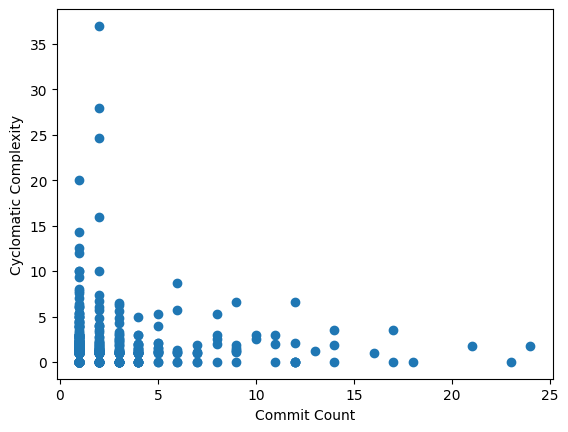

In [6]:
plt.scatter(x, y)
plt.xlabel('Commit Count')
plt.ylabel('Cyclomatic Complexity')
plt.show()

The graph shows that Commit Count and Cyclomatic Complexity share an inverse relationship. This may be because frequent interaction with the file leads to simplification of code logic, reducing the Cyclomatic Complexity.